In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from scipy.integrate import solve_ivp

In [2]:
#Dispersion relation
R_dim = 30e3
R_nondim = R_dim/300e3
beta_dim = 2e-12
beta_nondim = beta_dim * 86400 * 300e3
#Fourier harmonics
S = 10 #spectral radius
N = 41
P = 5 #radius of peak
H = 0.008 #height of peak (max amplitude)
def omega(k,l):
    return -beta_nondim * k / (k**2 + l**2 + R_nondim**-2)
def A(k,l):
    return H * np.exp(-0.5*(k**2+l**2-P**2)**2/(2*P**2))

In [3]:
k,l = np.linspace(-S,S,N),np.linspace(-S,S,N)
K,L = np.meshgrid(k,l)
phi = np.random.uniform(0,2*np.pi,size=(N,N))
omega_vals = omega(K,L)

def modulo_grid(x, y):
    x_mod = np.mod(x + np.pi, 2 * np.pi) - np.pi
    y_mod = np.mod(y + np.pi, 2 * np.pi) - np.pi
    return x_mod, y_mod

gamma = 0.1
def f(t,pos):  #time dependent
    x_mod,y_mod = modulo_grid(*pos)
    dpsi_dx = np.real(np.sum(1j*K*A(K,L)*np.exp(1j*(K*x_mod + L*y_mod - omega_vals*t + phi))))
    dpsi_dy = np.real(np.sum(1j*L*A(K,L)*np.exp(1j*(K*x_mod + L*y_mod - omega_vals*t + phi))))
    dphi_dx = dpsi_dx
    dphi_dy = dpsi_dy
    u = gamma * dphi_dx - (1-gamma) * dpsi_dy
    v = gamma * dphi_dy + (1-gamma) * dpsi_dx
    return [u,v]

In [4]:
t_span = (0,200)
t_eval = np.arange(0, 200)
n = 100
total_number_of_points = n ** 2
initial_conditions = np.array([[2 * np.pi * ((i/n) - 0.5) , 2 * np.pi * ((j/n) - 0.5)] \
            for j in range(n) for i in range(n)])
solutions = []

for y0 in initial_conditions:
    sol = solve_ivp(f, t_span, y0, t_eval=t_eval)
    solutions.append(sol)

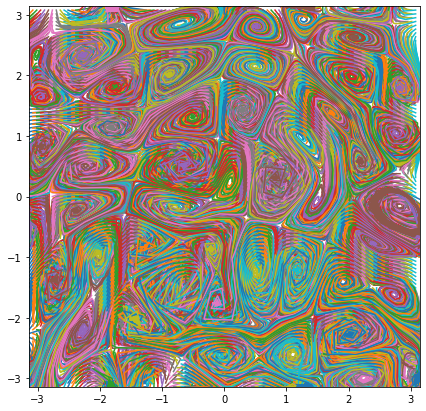

In [5]:
# Save the trajectories
file = open('Trajectory', 'wb')
pickle.dump(solutions, file)

#Plot the trajectories
plt.figure(figsize=(7, 7))
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
for sol in solutions: 
    plt.plot(sol.y[0],sol.y[1])
plt.savefig('Trajectory.png')

In [6]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from scipy.optimize import curve_fit

In [7]:
file = open('Trajectory', 'rb')
solutions = pickle.load(file)
file.close()

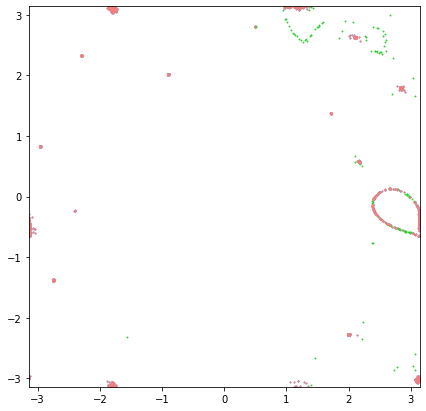

In [18]:
rho_bar = 2   # can vary
threshold = 2 * np.pi / (np.sqrt(total_number_of_points) + 1)

def modulo(x):
    x_mod = np.mod(x + np.pi, 2 * np.pi) - np.pi
    return x_mod

t1 = 100
points_t1 = np.zeros((total_number_of_points,2))
plt.figure(figsize=(7, 7))
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
i = 0
for solution in solutions:  
    y1 = solution.y[0][t1]
    y2 = solution.y[1][t1]        
    points_t1[i] = [y1,y2]
    i += 1
        
points_nearby = []
points_not_nearby = []
points_nearby_1 = []


for p in range(total_number_of_points):
    
    
    points = 0
    points_distance = []
    points_sorted_distance = []
    
    
    
    point_p = points_t1[p]
    for j in range(total_number_of_points):
        point_j = points_t1[j]
        distance = np.linalg.norm(point_p - point_j)
        points_distance = np.append(points_distance, distance)
        
    points_sorted_distance = points_distance[np.argsort(points_distance)]
    rho1=(points_sorted_distance[13] / 2)/threshold
    rho = 1 /( rho1 ** 2)
   
    
    
    if 1000  > rho >=1:
        points_nearby = np.append(points_nearby, p)
    if rho >=1000 :
        points_nearby_1 = np.append(points_nearby, p)
    if rho < 1:
        points_not_nearby = np.append(points_not_nearby, p)
        
    
    
# points_nearby = [p for p in points_t1 if \
#                  len(j for j in points_t1 if np.linalg.norm(p - j) <= threshold) > 3]
# points_not_nearby = [p for p in points_t1 if \
#                  len(j for j in points_t1 if np.linalg.norm(p - j) <= threshold) <= 3]

for point in points_nearby:
    point = int(point)
    plt.scatter(modulo(points_t1[point][0]),modulo(points_t1[point][1]), c = 'cornflowerblue',s = 0.8)
for point in points_not_nearby:
    point = int(point)
    plt.scatter(modulo(points_t1[point][0]),modulo(points_t1[point][1]), c = 'limegreen', s = 0.8)
for point in points_nearby_1:
    point = int(point)
    plt.scatter(modulo(points_t1[point][0]),modulo(points_t1[point][1]), c = 'lightcoral', s = 0.8)  
    
plt.savefig(f'points_time{t1}.png')

# points_nearby
# points_not_nearby
# points_t1

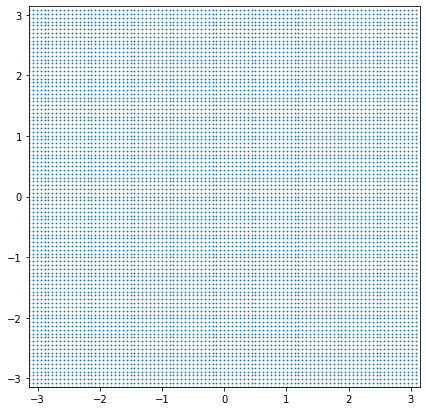

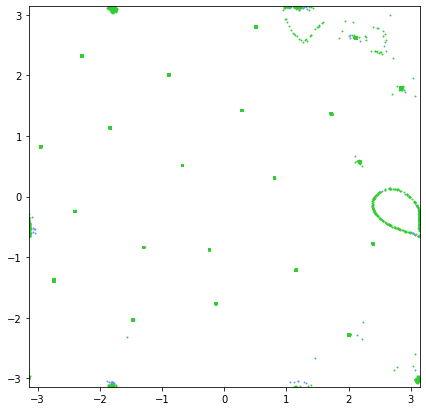

In [16]:
plt.figure(figsize=(7, 7))
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
plt.scatter(initial_conditions[:,0],initial_conditions[:,1],marker = 'o',s = 0.8)
plt.savefig('points_time[0].png')

rho_bar = 2   # can vary
threshold = 2 * np.pi / (np.sqrt(total_number_of_points) + 1)

def modulo(x):
    x_mod = np.mod(x + np.pi, 2 * np.pi) - np.pi
    return x_mod

t1 = 100
points_t1 = np.zeros((total_number_of_points,2))
plt.figure(figsize=(7, 7))
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
i = 0
for solution in solutions:  
    y1 = solution.y[0][t1]
    y2 = solution.y[1][t1]        
    points_t1[i] = [y1,y2]
    i += 1
        
points_nearby = []
points_not_nearby = []
points_nearby_1 = []


for p in range(total_number_of_points):
    points = 0
    points_distance = 0
    point_p = points_t1[p]
    for j in range(total_number_of_points):
        point_j = points_t1[j]
        if np.linalg.norm(point_p - point_j) <= ((2 + np.sqrt(5)) / 2) * threshold:
            points_distance = points_distance + np.linalg.norm(point_p - point_j)
            points += 1
    if 1000 * threshold >= (points_distance / (4*(2+np.sqrt(2)+1))) / (points / 13) > threshold :
        points_nearby = np.append(points_nearby, p)
    if (points_distance / (4*(2+np.sqrt(2)+1))) / (points / 13) > 1000 * threshold :
        points_nearby_1 = np.append(points_nearby, p)
    if (points_distance / (4*(2+np.sqrt(2)+1))) / (points / 13) <= threshold :
        points_not_nearby = np.append(points_not_nearby, p)
        
    
    
# points_nearby = [p for p in points_t1 if \
#                  len(j for j in points_t1 if np.linalg.norm(p - j) <= threshold) > 3]
# points_not_nearby = [p for p in points_t1 if \
#                  len(j for j in points_t1 if np.linalg.norm(p - j) <= threshold) <= 3]

for point in points_nearby:
    point = int(point)
    plt.scatter(modulo(points_t1[point][0]),modulo(points_t1[point][1]), c = 'cornflowerblue',s = 0.8)
for point in points_not_nearby:
    point = int(point)
    plt.scatter(modulo(points_t1[point][0]),modulo(points_t1[point][1]), c = 'limegreen', s = 0.8)
for point in points_nearby_1:
    point = int(point)
    plt.scatter(modulo(points_t1[point][0]),modulo(points_t1[point][1]), c = 'lightcoral', s = 0.8)  
    
plt.savefig(f'points_time{t1}.png')

# points_nearby
# points_not_nearby
# points_t1

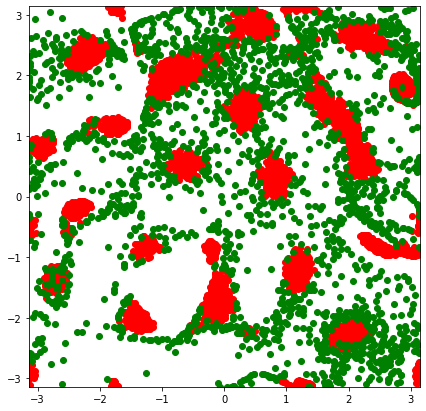

In [9]:
t1 = 10
points_t1 = np.zeros((total_number_of_points,2))
plt.figure(figsize=(7, 7))
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
i = 0
for solution in solutions:  
    y1 = solution.y[0][t1]
    y2 = solution.y[1][t1]        
    points_t1[i] = [y1,y2]
    i += 1
        
points_nearby = []
points_not_nearby = []
for p in range(total_number_of_points):
    points = 0
    points_distance = 0
    point_p = points_t1[p]
    for j in range(total_number_of_points):
        point_j = points_t1[j]
        if np.linalg.norm(point_p - point_j) <= ((2 + np.sqrt(5)) / 2) * threshold:
            points_distance = points_distance + np.linalg.norm(point_p - point_j)
            points += 1
    if points_distance > threshold * (4*(2+np.sqrt(2)+1)):
        points_nearby = np.append(points_nearby, p)
    else:
        points_not_nearby = np.append(points_not_nearby, p)
        
    
    
# points_nearby = [p for p in points_t1 if \
#                  len(j for j in points_t1 if np.linalg.norm(p - j) <= threshold) > 3]
# points_not_nearby = [p for p in points_t1 if \
#                  len(j for j in points_t1 if np.linalg.norm(p - j) <= threshold) <= 3]

for point in points_nearby:
    point = int(point)
    plt.scatter(modulo(points_t1[point][0]),modulo(points_t1[point][1]), c = 'red')
for point in points_not_nearby:
    point = int(point)
    plt.scatter(modulo(points_t1[point][0]),modulo(points_t1[point][1]), c = 'green')
    
plt.savefig('points_time[10].png')

In [27]:
points

NameError: name 'points' is not defined

In [ ]:
len(points_nearby)

In [ ]:
len(points_not_nearby)

In [9]:
total_number_of_points = 1600   # need to adapt to the data
points_t = np.zeros((total_number_of_points, 2))   # need to adapt to the data
times_micro = np.arange(0, 100, 1)   # time period, can vary
prop_s_micro = []  
for time in times_micro:
    i = 0
    inside = 0
    rho_t = []
    for solution in solutions:      
        y1 = solution.y[0][time]
        y2 = solution.y[1][time]        
        points_t[i] = [y1, y2]
        i = i + 1       
    for target_point in points_t:      
        points_nearby = len([p for p in points_t if np.linalg.norm(p - target_point) <= threshold])
        rho_t = np.append(rho_t, points_nearby)
        x, y = points_nearby
        if -np.pi <= x < np.pi and -np.pi <= y < np.pi:
            inside += 1
        
    heaviside = rho_t[rho_t >= rho_bar]
    proportion = len(heaviside) / inside
    prop_s_micro = np.append(prop_s_micro, proportion) 

TypeError: cannot unpack non-iterable int object

In [2]:
def func(times, A, Rm):
    return 1 - A * np.exp(-Rm * times)
para_s, pcov = curve_fit(func, times_micro, prop_s_micro)
A, Rm = para_s
plt.plot(times_micro, func(times_micro,A,Rm),linestyle = '--', label = "fitted (clustering rate = 0.1547)")
plt.plot(times_micro, prop_s_micro, label = "Raw (days from 1 to 50)")
plt.legend(loc = 'lower right')
plt.xlabel('time(days)')
plt.ylabel('cluster mass (proportion)')
print("the clustering rate is:", Rm)
plt.savefig('Micro.png')

NameError: name 'curve_fit' is not defined

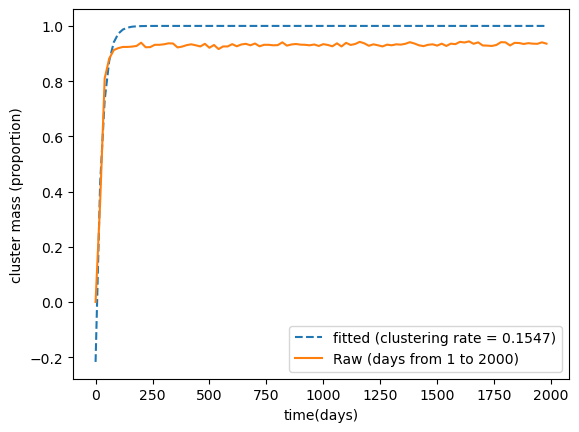

In [16]:
# def func(times, A, Rm):
#     return 1 - A * np.exp(-Rm * times)
# para_s, pcov = curve_fit(func, times_macro, prop_s_macro)
# A, Rm = para_s
plt.plot(times_macro, func(times_macro,A,Rm),linestyle = '--', label = "fitted (clustering rate = 0.1547)")
plt.plot(times_macro, prop_s_macro, label = "Raw (days from 1 to 2000)")
plt.xlabel('time(days)')
plt.ylabel('cluster mass (proportion)')
plt.legend(loc = 'lower right')
plt.savefig('Macro.png')